## Importing Basic Libraries

In [13]:
import numpy as np
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_digits
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, cross_val_score
import matplotlib.pyplot as plt
from sklearn import svm
import pickle

## Loading MNIST Dataset

In [2]:
digits=load_digits()
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))
X_train,X_test,y_train,y_test=train_test_split(digits.data,digits.target,test_size=0.25,random_state=0)

## Setting the ColorMap

In [3]:
plt.set_cmap('viridis')

<Figure size 432x288 with 0 Axes>

# Checking Image Data

Image Array:-
 [[ 0.  0.  0.  1. 11.  0.  0.  0.]
 [ 0.  0.  0.  7.  8.  0.  0.  0.]
 [ 0.  0.  1. 13.  6.  2.  2.  0.]
 [ 0.  0.  7. 15.  0.  9.  8.  0.]
 [ 0.  5. 16. 10.  0. 16.  6.  0.]
 [ 0.  4. 15. 16. 13. 16.  1.  0.]
 [ 0.  0.  0.  3. 15. 10.  0.  0.]
 [ 0.  0.  0.  2. 16.  4.  0.  0.]]

Result:-  4


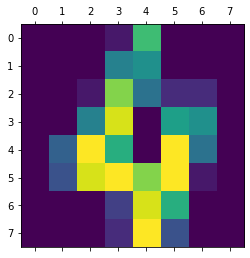

In [4]:
a=digits.images[4]
b=digits.target[4]
print("Image Array:-\n",a,end="\n\n")
print("Result:- ",b)
plt.matshow(a)

# Training Model

In [8]:
model=svm.SVC(gamma=0.001)
model.fit(X_train,y_train)
predicted=model.predict(X_test)

# Plotting Confusion Matrix


Classification report for classifier SVC(gamma=0.001):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        37
           1       1.00      1.00      1.00        43
           2       1.00      1.00      1.00        44
           3       1.00      1.00      1.00        45
           4       1.00      1.00      1.00        38
           5       0.98      0.98      0.98        48
           6       1.00      1.00      1.00        52
           7       1.00      1.00      1.00        48
           8       1.00      1.00      1.00        48
           9       0.98      0.98      0.98        47

    accuracy                           1.00       450
   macro avg       1.00      1.00      1.00       450
weighted avg       1.00      1.00      1.00       450




c:\Users\utkar\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)



Accuracy of the Algorithm:  0.9955555555555555


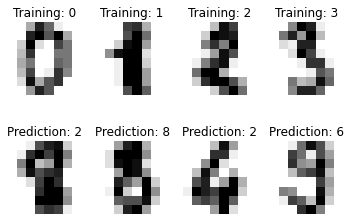

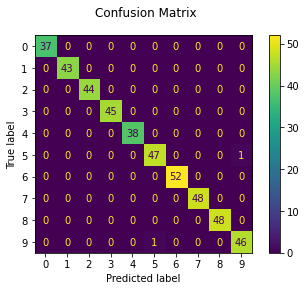

In [10]:
_, axes = plt.subplots(2, 4)
images_and_labels = list(zip(digits.images, digits.target))
for ax, (image, label) in zip(axes[0, :], images_and_labels[:4]):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title('Training: %i' % label)
    
images_and_predictions = list(zip(digits.images[n_samples // 2:], predicted))
for ax, (image, prediction) in zip(axes[1, :], images_and_predictions[:4]):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title('Prediction: %i' % prediction)
print("\nClassification report for classifier %s:\n%s\n" % (model, metrics.classification_report(y_test, predicted)))
disp = metrics.plot_confusion_matrix(model, X_test, y_test)
disp.figure_.suptitle("Confusion Matrix")
print("\nAccuracy of the Algorithm: ", model.score(X_test, y_test))
plt.show()

# Saving The Model

In [14]:
pickle.dump(model, open("mnist.pkl", 'wb'))

# Creating GUI

In [19]:
from tkinter import *
import tkinter as tk
import win32gui
from PIL import ImageGrab, Image
model=pickle.load(open("mnist.pkl","rb"))


def predict_digit(img):
    img = img.resize((28,28))
    img = img.convert('L')
    img = np.array(img)
    img = img.reshape(1,28,28,1)
    img = img/255.0
    res = model.predict([img])[0]
    return np.argmax(res), max(res)

class App(tk.Tk):
    def __init__(self):
        tk.Tk.__init__(self)
        self.x = self.y = 0
        self.canvas = tk.Canvas(self, width=300, height=300, bg = "white", cursor="cross")
        self.label = tk.Label(self, text="Thinking..", font=("Helvetica", 48))
        self.classify_btn = tk.Button(self, text = "Recognise", command =         self.classify_handwriting) 
        self.button_clear = tk.Button(self, text = "Clear", command = self.clear_all)
        self.canvas.grid(row=0, column=0, pady=2, sticky=W, )
        self.label.grid(row=0, column=1,pady=2, padx=2)
        self.classify_btn.grid(row=1, column=1, pady=2, padx=2)
        self.button_clear.grid(row=1, column=0, pady=2)
        self.canvas.bind("<B1-Motion>", self.draw_lines)
    def clear_all(self):
        self.canvas.delete("all")
    def classify_handwriting(self):
        HWND = self.canvas.winfo_id()
        rect = win32gui.GetWindowRect(HWND)
        im = ImageGrab.grab(rect)
        digit, acc = predict_digit(im)
        self.label.configure(text= str(digit)+', '+ str(int(acc*100))+'%')
    def draw_lines(self, event):
        self.x = event.x
        self.y = event.y
        r=8
        self.canvas.create_oval(self.x-r, self.y-r, self.x + r, self.y + r, fill='black')
app = App()
mainloop()

Exception in Tkinter callback
Traceback (most recent call last):
  File "c:\Users\utkar\anaconda3\lib\tkinter\__init__.py", line 1892, in __call__
    return self.func(*args)
  File "C:\Users\utkar\AppData\Local\Temp\ipykernel_20108\121074167.py", line 36, in classify_handwriting
    digit, acc = predict_digit(im)
  File "C:\Users\utkar\AppData\Local\Temp\ipykernel_20108\121074167.py", line 14, in predict_digit
    res = model.predict([img])[0]
  File "c:\Users\utkar\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 791, in predict
    y = super().predict(X)
  File "c:\Users\utkar\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 414, in predict
    X = self._validate_for_predict(X)
  File "c:\Users\utkar\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 592, in _validate_for_predict
    X = self._validate_data(
  File "c:\Users\utkar\anaconda3\lib\site-packages\sklearn\base.py", line 566, in _validate_data
    X = check_array(X, **check_params)
  File "c:\Users\utkar